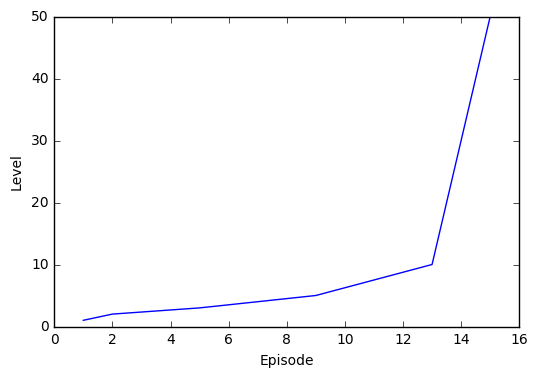

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

y = np.array([1, 2, 3, 5, 10, 50], np.float32)
x = np.array([1, 2, 5, 9, 13, 15])
plt.plot(x, y)
plt.xlabel("Episode")
plt.ylabel("Level")